In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from random import randint, randrange, uniform

In [2]:
def decomposition(leftovers,min_val,max_val):
        while leftovers > 0:
            if(leftovers > min_val):
                n = randint(min_val, max_val)
                # avoid chance of small future value by discarding n if the new remains are too small
                if((leftovers - n) < min_val): 
                    n = leftovers
            yield n
            leftovers -= n
tmp = list(decomposition(128,10,30))
print(tmp)
np.sum(tmp)

[27, 25, 11, 27, 14, 24]


128

Step vals: [7, 5, 8, 3, 3, 3]


(0, 8)

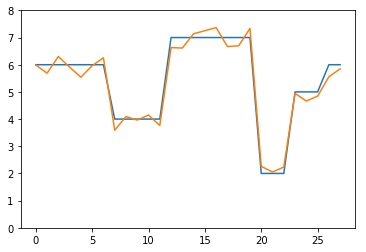

In [5]:
dim = 28
width = np.zeros(dim,dtype=np.uint8)
wall_width = 2
start = np.array([0,int(dim/2)])
w, h = dim,dim
data = np.zeros((h, w), dtype=np.uint8)
min_width, max_width = 2,8
step_vals = list(decomposition(dim,min_width,max_width)) # generate random partitions
print("Step vals:",step_vals)
total = 0

for i in range(len(step_vals)):
    width[total:total+step_vals[i]] = randrange(min_width,max_width)
    total += step_vals[i]

for i in range(dim):
    data[i,start[1]+width[i]:start[1]+width[i]+wall_width] = 255 # left wall
    data[i,start[1]-width[i]:start[1]-width[i]+wall_width] = 255 # right wall

img = Image.fromarray(data, 'L')
display(img)

speed = np.zeros(dim)
for i in range(len(speed)):
    speed[i] = width[i] + uniform(-0.5,0.5)

plt.plot(width)
plt.plot(speed)
plt.ylim(0,max_width)

In [7]:
dim = 28
wall_width = 2
start = np.array([0,int(dim/2)])
w, h = dim,dim
min_width, max_width = 2,8
n_samples = 500
speed_labels = []

for idx in range(n_samples):
    width = np.zeros(dim,dtype=np.uint8)
    data = np.zeros((h, w), dtype=np.uint8)
    step_vals = list(decomposition(dim,min_width,max_width)) # generate random partitions
    total = 0

    for i in range(len(step_vals)):
        width[total:total+step_vals[i]] = randrange(min_width,max_width)
        total += step_vals[i]

    for i in range(dim):
        data[i,start[1]+width[i]:start[1]+width[i]+wall_width] = 255 # left wall
        data[i,start[1]-width[i]:start[1]-width[i]+wall_width] = 255 # right wall

    img = Image.fromarray(data, 'L')
    img.save("%s%i%s" % ('/Users/roberto/code/speed-from-image/images/img-',idx,'.png'))
    
    # Add noise to width data and treat this as speed
    speed = np.zeros(dim)
    for i in range(len(speed)):
        speed[i] = width[i] + uniform(-0.5,0.5)
    speed_labels.append(speed)

np.savetxt('/Users/roberto/code/speed-from-image/images/speed_labels.csv', speed_labels, delimiter=',',fmt='%10.5f')